In [118]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [129]:
batch_size = 64
dataset = tfds.load("emnist", as_supervised=True)

In [122]:
dataset['train'] = dataset['train'].shuffle(1024).batch(batch_size)
dataset['test'] = dataset['test'].shuffle(1024).batch(batch_size)

In [ ]:
# 建立CNN模型
input_shape=(28, 28, 1)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(62, activation="softmax"),
    ]
)

In [ ]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
learning_rate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
# 模型訓練
num_epochs = 10
history = model.fit(dataset['train'], validation_data=dataset['test'], epochs=num_epochs)


In [ ]:
history.history

{'loss': [0.7783610224723816,
  0.5564548969268799,
  0.5321526527404785,
  0.5227609872817993,
  0.5186741352081299,
  0.5140623450279236,
  0.512546956539154,
  0.5099117159843445,
  0.5072616338729858,
  0.5071765780448914,
  0.5075405836105347,
  0.5073583722114563,
  0.5075625777244568,
  0.5039680600166321,
  0.5035231709480286,
  0.5009380578994751,
  0.5017950534820557,
  0.5011469125747681,
  0.49942898750305176,
  0.5001938939094543],
 'sparse_categorical_accuracy': [0.7675991654396057,
  0.8137640953063965,
  0.8203248977661133,
  0.8225486278533936,
  0.8239656686782837,
  0.8252996206283569,
  0.8260446786880493,
  0.8265318274497986,
  0.8272238373756409,
  0.8272711634635925,
  0.8279746174812317,
  0.8272266983985901,
  0.827140748500824,
  0.828037679195404,
  0.8285119533538818,
  0.8292412161827087,
  0.8291767835617065,
  0.8291208744049072,
  0.8296324014663696,
  0.8292441368103027],
 'val_loss': [0.47010406851768494,
  0.4473095238208771,
  0.43586236238479614,
 

Text(0, 0.5, 'Accuracy')

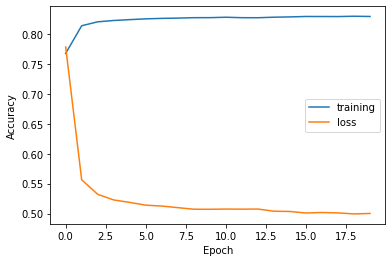

In [ ]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['sparse_categorical_accuracy'], label='training')
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
model.save('emnist.h5',
      overwrite=True,
      include_optimizer=True,
      save_format='h5')

# Tensoflow Dataset 操作

In [123]:
import pandas as pd
df = pd.DataFrame()

In [ ]:
x = next(iter(dataset['train']))[0][1]
x.numpy()
x.shape

TensorShape([28, 1])

In [124]:
image = []
for i in next(iter(dataset['train']))[0]:
  i = tf.squeeze(i)
  i = i.numpy()
  image.append(i)
label = []
for i in next(iter(dataset['train']))[1]:
  i = int(i)
  label.append(i)

In [125]:
df['image'] = image
df['label'] = label

In [ ]:
df = df.sort_values(by=['label'])
df = df.drop_duplicates(subset = "label")

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9',
    'A','B','C','D','E','F','G','H','I','J',
    'K','L','M','N','O','P','Q','R','S','T',
    'U','V','W','X','Y','Z',
    'a','b','c','d','e','f','g','h','i','j',
    'k','l','m','n','o','p','q','r','s','t',
    'u','v','w','x','y','z']

O


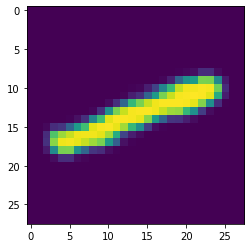

4


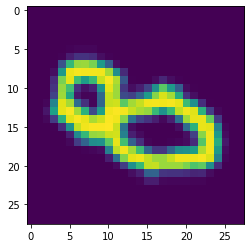

r


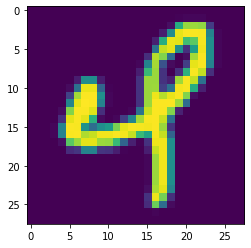

S


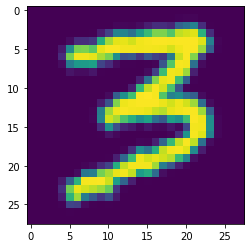

1


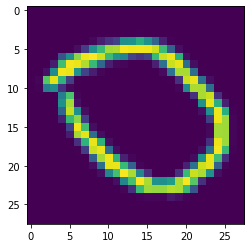

1


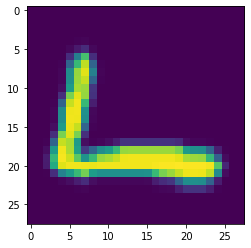

7


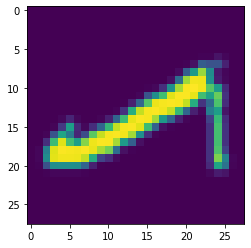

S


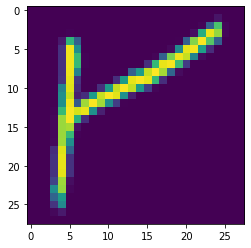

4


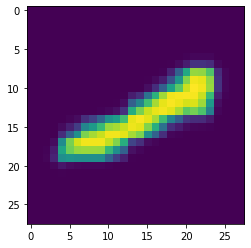

5


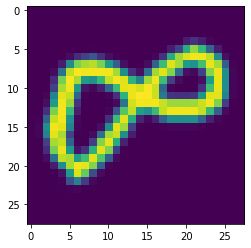

In [126]:
for i in range(10):
  label_num =df['label'].iloc[i]
  print(labels[label_num])
  plt.Figure(figsize=(10, 10))
  x = df['image'].iloc[i]
  plt.imshow(tf.squeeze(x))
  plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('emnist_model.h5')